# Plot results for different Policies

In [1]:
import pandas as pd

%matplotlib inline  
import matplotlib.pyplot as plt

In [56]:
file_name = '5000_reviews_lemmatized_experiment_nums_10_ninstq_100.csv'
b_per_item = 3

# Budget Allocation Heuristics on Amazon Reviews

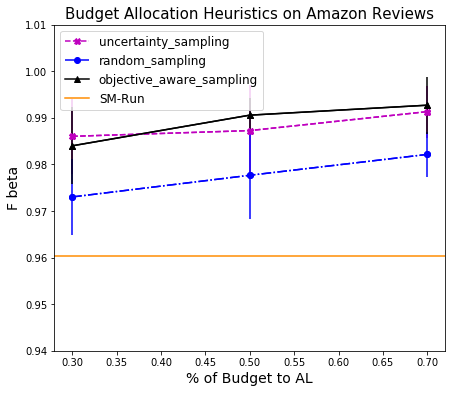

In [57]:
def plot_charts(df, algos, b_per_item):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,6))    
    markers = ['X', 'o', '^']
    for alg, c, l, m in zip(algos, ['m', 'b', 'black'], ['--', '-.', '-'], markers):
        x = df.loc[(df['active_learning_strategy'] == alg) & (df['budget_per_item_mean'] == b_per_item)]['AL_switch_point_mean'].values 
        y = df.loc[(df['active_learning_strategy'] == alg)  & (df['budget_per_item_mean'] == b_per_item)]['f_beta_mean'].values
        y_std = df.loc[(df['active_learning_strategy'] == alg)  & (df['budget_per_item_mean'] == b_per_item)]['f_beta_std'].values
        ax.plot(x, y, label=alg, color=c, linestyle=l, marker=m)
        ax.errorbar(x, y, yerr=y_std, marker=m, linestyle=l, color=c)
#         ax.fill_between(x, y-y_std, y+y_std, alpha=0.05, color=c)
        ax.set_xlabel('% of Budget to AL', size=14)
        ax.set_ylabel('F beta', size=14)
        ax.set_title('Budget Allocation Heuristics on Amazon Reviews', size=15)
        
#     Drow SM-run line
    ax.axhline(y=df.loc[(df['AL_switch_point_mean'] == 0) & (df['budget_per_item_mean'] == b_per_item)]['f_beta_mean'].values[0], linestyle='-', label='SM-Run', color='darkorange')
    ax.legend( fontsize=12)
    plt.ylim((0.94, 1.01))
            
def plot(file_name, b_per_item):
    plot_charts(pd.read_csv('../output/adaptive_machines_and_crowd/{}'.format(file_name)),
                ['uncertainty_sampling', 'random_sampling', 'objective_aware_sampling'], b_per_item)

plot(file_name, b_per_item)

# Budget Spent on Amazon Reviews

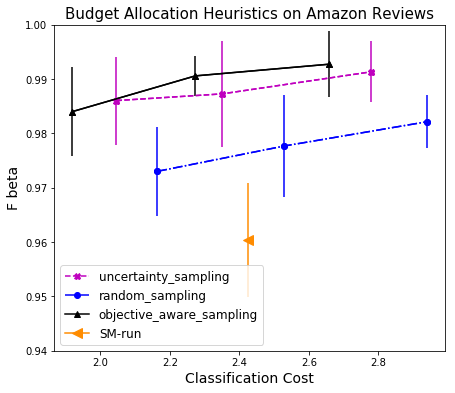

In [58]:
def plot_charts(df, algos, b_per_item):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,6))    
    markers = ['X', 'o', '^']
    for alg, c, l, m in zip(algos, ['m', 'b', 'black'], ['--', '-.', '-'], markers):
        x = df.loc[(df['active_learning_strategy'] == alg) & (df['budget_per_item_mean'] == b_per_item)]['budget_spent_per_item_mean'].values 
        y = df.loc[(df['active_learning_strategy'] == alg) & (df['budget_per_item_mean'] == b_per_item)]['f_beta_mean'].values
        y_std = df.loc[(df['active_learning_strategy'] == alg) & (df['budget_per_item_mean'] == b_per_item)]['f_beta_std'].values
        ax.plot(x, y, label=alg, color=c, linestyle=l, marker=m)
        ax.errorbar(x, y, yerr=y_std, marker=m, linestyle=l, color=c)
        ax.set_xlabel('Classification Cost', size=14)
        ax.set_ylabel('F beta', size=14)
        ax.set_title('Budget Allocation Heuristics on Amazon Reviews', size=15)
    
    # Plot SM-Run dot
    x_smr = df.loc[(df['AL_switch_point_mean'] == 0) & (df['budget_per_item_mean'] == b_per_item)]['budget_spent_per_item_mean'].values
    y_smr = df.loc[(df['AL_switch_point_mean'] == 0) & (df['budget_per_item_mean'] == b_per_item)]['f_beta_mean'].values
    y_smr_std = df.loc[(df['AL_switch_point_mean'] == 0) & (df['budget_per_item_mean'] == b_per_item)]['f_beta_std'].values
    ax.plot(x_smr, y_smr, label='SM-run', color='darkorange', marker='<', markersize=10)
    ax.errorbar(x_smr, y_smr, yerr=y_smr_std, color='darkorange', marker='<', linestyle='-')
    ax.legend( fontsize=12)
    plt.ylim((0.94, 1.))
            
def plot(file_name, b_per_item):
    plot_charts(pd.read_csv('../output/adaptive_machines_and_crowd/{}'.format(file_name)),
                ['uncertainty_sampling', 'random_sampling', 'objective_aware_sampling'], b_per_item)

plot(file_name, b_per_item)